# scikit-opt包介绍

[scikit-opt官方文档(中文)](https://scikit-opt.github.io/scikit-opt/#/zh/)

[scikit-opt官方文档(英文)](https://scikit-opt.github.io/scikit-opt/#/en/)

scikit-opt是一个Python库，用于解决各种优化问题。该库旨在提供一种简单、有效的方式来解决全局优化、参数优化等问题。scikit-opt提供了多种优化算法，包括遗传算法（Genetic Algorithm, GA）、粒子群优化（Particle Swarm Optimization, PSO）、模拟退火（Simulated Annealing, SA）等。

上面介绍的遗传算法、粒子群优化、模拟退火等，通常是基于自然界现象或者是某种随机过程进行模拟的算法。这类算法通常用于解决复杂的、非线性、高维、含有多个局部最优解的问题。传统优化算法通常适用于具有良好数学属性（如可微、凸等）的问题，而现代优化算法更适用于复杂、非线性、不规则的问题。

**注意：** 现代优化算法通常是随机的或者至少含有随机成分，且没有严格的数学理论支撑，通常基于实验或模拟结果，不能保证得到最优结果。

我们以遗传算法为例：遗传算法是一种模拟自然界中生物进化过程的搜索和优化算法。该算法通过模拟自然选择、交叉（杂交）和变异等遗传机制来在解空间中搜索最优解。

遗传算法一般包括以下几个步骤：

1. 初始化：生成一个包含多个随机解的初始种群。
2. 评估：使用适应度函数评估种群中每个个体（解）的质量。
3. 选择：根据适应度函数的值选择更优的个体作为父代。
4. 交叉（Crossover）：通过组合父代的特点生成子代。
5. 变异（Mutation）：以一定的概率对子代进行小的随机变化。
6. 更新：用新生成的子代替换部分或全部的当前种群。
7. 终止条件：达到预设的迭代次数或找到满足条件的解。

我们先从一个较为简单的例子开始说起，尝试寻找$f(x)=x^2-4x+4$的最小值

最优解：[1.99999997], 最优值：[8.8817842e-16]


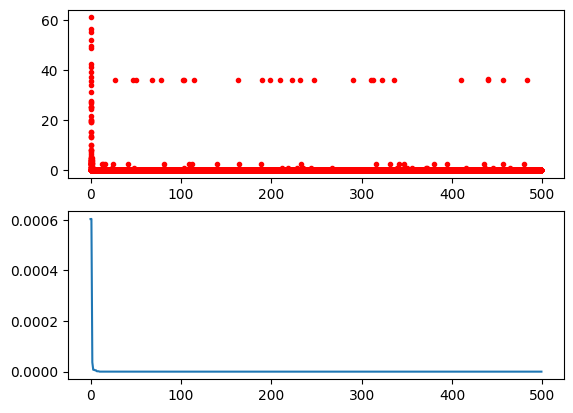

In [1]:
from sko.GA import GA
import pandas as pd
import matplotlib.pyplot as plt

# 定义目标函数
def fitness_function(x):
    return x[0] ** 2 - 4 * x[0] + 4

# 创建遗传算法对象
ga = GA(func=fitness_function, n_dim=1, size_pop=50, max_iter=500, lb=[0], ub=[10])

# 执行优化
best_x, best_y = ga.run()

# 输出结果
print(f"最优解：{best_x}, 最优值：{best_y}")

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).plot(kind='line')
plt.show()

旅行商问题是一个经典的组合优化问题，目的是找到一条最短的路径，使得一个旅行商可以访问所有给定的城市并返回到原点。每个城市只能访问一次。TSP是一个NP-困难问题，对于大规模问题，精确解法（如动态规划、分枝定界等）的计算时间复杂性极高。遗传算法提供了一种相对高效的近似解法。scikit-opt包对旅行商问题做了特化处理，`GA_TSP`函数可以更方便的解决旅行商问题，下面看一个简单的例子。

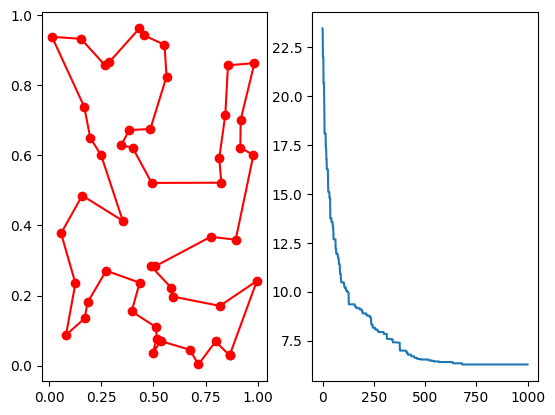

In [2]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.GA import GA_TSP

# 生成随机的50个点坐标
num_points = 50
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


#输入顺序，计算总距离的函数
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

#创建遗传算法对象，并计算
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=1000, prob_mut=1)
best_points, best_distance = ga_tsp.run()

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()